#Stock Share Analysis prediciton
#Jesus Ugarte
#University of Central Florida

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as web
import datetime as dt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [43]:
#Load Data
company = 'DOGE-USD'

#Load data from one year ago
start = dt.datetime(datetime.now().year, datetime.now().month-3, 1)
end = dt.datetime.now()

data = web.DataReader(company, 'yahoo', start, end)


In [44]:

#Prepare Data
#Fit all Data into 0 and 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))



In [45]:
#Define how many days look into the past to base my prediction
prediction_days = 60

x_train =[]
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x , 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train, = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the Model
model = Sequential()


In [46]:


#BUILDING MODEL
#Parameters can be changed for bettter or worse performance
model.add(LSTM(units=50, return_sequences = True, input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #preditction of the next closing value

model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs =25, batch_size = 32)


Epoch 1/25
2/2 [==============================] - 5s 54ms/step - loss: 0.4974
Epoch 2/25
2/2 [==============================] - 0s 57ms/step - loss: 0.2931
Epoch 3/25
2/2 [==============================] - 0s 56ms/step - loss: 0.1227
Epoch 4/25
2/2 [==============================] - 0s 59ms/step - loss: 0.0141
Epoch 5/25
2/2 [==============================] - 0s 56ms/step - loss: 0.0336
Epoch 6/25
2/2 [==============================] - 0s 56ms/step - loss: 0.0515
Epoch 7/25
2/2 [==============================] - 0s 58ms/step - loss: 0.0155
Epoch 8/25
2/2 [==============================] - 0s 58ms/step - loss: 0.0138
Epoch 9/25
2/2 [==============================] - 0s 55ms/step - loss: 0.0096
Epoch 10/25
2/2 [==============================] - 0s 57ms/step - loss: 0.0119
Epoch 11/25
2/2 [==============================] - 0s 58ms/step - loss: 0.0124
Epoch 12/25
2/2 [==============================] - 0s 57ms/step - loss: 0.0107
Epoch 13/25
2/2 [==============================] - 0s 57ms/st

In [47]:

#Testing the model accuracy on existing data
#Load test Data
test_start = start
test_end = end
test_data = data


actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']), axis =0)

model_inputs = total_dataset[len(total_dataset)- len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)



In [48]:
# Make Predictions on test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



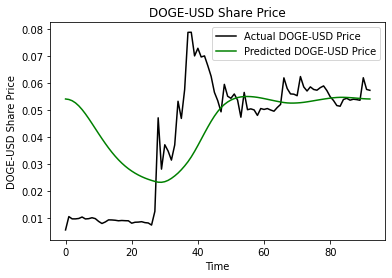

In [49]:
#Plot the test predicitons 

plt.plot(actual_prices, color="black", label= f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label= f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [50]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1)]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)

prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction} Tomorrow's Price")

prediction: [[0.05413247]] Tomorrow's Price
